## Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.


### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

Наименование столбцов:
- customerID - id клиента
- BeginDate - дата заключения
- EndDate - дата окончания
- Type - тип контракта
- PaperlessBilling - тип оплаты
- PaymentMethod - метод оплаты
- MonthlyCharges - месячное списание
- TotalCharges - всего списано
- InternetService - тип интернет подключения
- OnlineSecurity - онлайн безопасность
- OnlineBackup - онлайн резервная копия
- DeviceProtection - защита устройства
- TechSupport - техническая поддержка
- StreamingTV - Просмотр ТВ
- StreamingMovies - Просмотр кино
- gender - пол
- SeniorCitizen - пожилой(0/1) пользователь
- Partner - партнер(0/1)
- Dependents - зависимый финансово(0/1) пользователь
- MultipleLines - подключение к нескольким линям одновременно (0/1)


# План решения задачи <a id='0.0'></a>


### Часть 1. Загрузка и подготовка данных <a id='1.0'></a>

<a href='#1.1'>1.1 Открытие файлов и изучение.'</a>

<a href='#1.2'>1.2 Объединение таблиц'</a>

<a href='#1.3'>1.3 Предобработка данных'</a>

<a href='#1.4'>1.4 Исследование корреляции признаков и Статистических (распределения) данных'</a>


### Часть 2. Анализ данных <a id='2.0'></a>

<a href='#2.1'>2.1 Анализ действующих клиентов и отключенных клиентов'</a>

<a href='#2.2'>2.2 Исследование платежей  действующих клиентов и отключенных клиентов'</a>

<a href='#2.3'>2.3  Анализ клиентов по способу оплаты услуги'</a>

<a href='#2.4'>2.4 Анализ количества используемых линий стационнарной связи'</a>

<a href='#2.5'>2.5 Исследование количества интернет подключения(Fiber optic or DSL)'</a>

<a href='#2.6'>2.6 Анализ взаимосвязи между отключенными клиентами и Интернет-безопасность,TechSupport,OnlineBackup,StreamingTV,StreamingMovies'</a>

### Часть 3. Построение модели <a id='3.0'></a>

<a href='#3.1'>3.1. Создание признаков(target and features), кодирование и масштабирование признаков, балансировка, разделение данных, создание новых, удаление ненужных.'</a>

<a href='#3.2'>3.2. Определение метрик, обучение разных моделей, подбор гиперпараметров и оценка их качества кросс-валидацией'</a>

<a href='#3.3'>3.3 Проверка лучшей модели на адекватность и тестирование лучшей модели'</a>


### Часть 4. Вывод <a id='4.0'></a>

<a href='#4.1'> Основные выводы полученные в ходе решения задачи'</a>

### Часть 1. Загрузка и подготовка данных <a id='1.0'></a>

#### 1.1 Открытие файлов и изучение. <a id='1.1'></a>

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, make_scorer, roc_curve, confusion_matrix
from sklearn.metrics import f1_score, recall_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from catboost import Pool
from sklearn.utils import shuffle
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
# Импортируем необходимые библиотеки.

In [2]:
contract = pd.read_csv('/Users/kazbek/Desktop/Python/Payton/DS - обучение/final_provider/contract.csv')
internet = pd.read_csv('/Users/kazbek/Desktop/Python/Payton/DS - обучение/final_provider/internet.csv')
personal = pd.read_csv('/Users/kazbek/Desktop/Python/Payton/DS - обучение/final_provider/personal.csv')
phone = pd.read_csv('/Users/kazbek/Desktop/Python/Payton/DS - обучение/final_provider/phone.csv')
# прочтем файлы и создадим переменные для каждой таблицы
#contract = pd.read_csv('/datasets/final_provider/contract.csv')
#internet = pd.read_csv('/datasets/final_provider/internet.csv')
#personal = pd.read_csv('/datasets/final_provider/personal.csv')
#phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
def acquaintance(data):
    display(data.info())
    display(data.sample(n=8))
    display(data.describe())
    display(f'Количество пропусков: \n{(data.isna().sum())}')
    display(f'Количество дубликатов - {data.duplicated().sum()}')
#Так как у нас 4 таблицы, для облегчения создадим функцию,которая принимает таблицу на вход для просмотра и определения пропусков и дубликатов.

In [4]:
acquaintance(contract)
#Применяем функцию для просмотра данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4712,7550-WIQVA,2015-12-01,No,One year,Yes,Electronic check,108.25,5431.4
399,5876-QMYLD,2018-03-01,No,One year,No,Mailed check,20.05,415.1
574,6030-REHUX,2017-10-01,No,Month-to-month,Yes,Electronic check,110.85,3204.4
6441,5084-OOVCJ,2018-09-01,No,Month-to-month,Yes,Credit card (automatic),55.35,920.5
3903,5206-XZZQI,2015-09-01,No,Month-to-month,Yes,Mailed check,80.60,4348.1
6457,2233-TXSIU,2018-09-01,No,One year,No,Credit card (automatic),44.45,792.15
6566,3795-CAWEX,2014-04-01,No,Two year,Yes,Credit card (automatic),116.55,8152.3
5972,1324-NLTJE,2018-07-01,2019-10-01 00:00:00,Month-to-month,No,Credit card (automatic),55.00,757.1


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


'Количество пропусков: \ncustomerID          0\nBeginDate           0\nEndDate             0\nType                0\nPaperlessBilling    0\nPaymentMethod       0\nMonthlyCharges      0\nTotalCharges        0\ndtype: int64'

'Количество дубликатов - 0'

In [5]:
lost_client = contract[contract['EndDate'] != 'No']['EndDate'].count()
#Посмотрим на столбец EndDate отсортированный по завершенным договорам
display(f'Количество завершенных договоров: {lost_client}')
display(f'Процентное соотношение завершенных договоров: {lost_client/len(contract):.2%}')
display(contract['EndDate'].value_counts())
#Посмотрим на количество каждого значения в столбце EndDate

'Количество завершенных договоров: 1869'

'Процентное соотношение завершенных договоров: 26.54%'

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

In [6]:
display(contract['TotalCharges'].value_counts().head(10))
#Посмотрим на все уникальные значения во всех столбцах, для выявления аномалных значений
display(contract[contract['TotalCharges'] == ' '])
#Нашли аномальное значение в столбце TotalCharges - в виде пробела, посмотрим на них

20.2     11
         11
19.75     9
20.05     8
19.9      8
19.65     8
45.3      7
19.55     7
20.25     6
19.45     6
Name: TotalCharges, dtype: int64

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>В таблице contract у нас 7043 записи и 8 столбцов. Два типа данных: дробный и строчный.Пропусков и дубликатов нет. Столбцы BeginDate и EndDate имеют тип данных строчный, но должны быть типа DATE. Так же у нас столбец TotalCharges имеет не правильный тип данных, его нужно будет перевести в дробный. Столбец EndDate у нас будет целевым признаком: всего у нас 7043 договора, из них 1869 уже закрытых договоров и 5174 действующих. Процент закрытых договоров - 26.5%. В принципе, мы можем даты в этом столбце заменить на 1, а значение 'No' на 0 - и у нас будет целевой признак(нам даты закрытия не понадобятся). Так же странно, что отток клиентов произошел в последние 4 месяца, возможно были изменения в тарифах или услугах в последнии 4 месяца, что негативно повлияло на клиентопоток. Еще в столбце TotalCharges у нас есть 11 пустых значений по договорам заключенным в последнем месяце, клиенты которые еще не оплатили услуги - новые клиенты, нужно заменить их на значение 0.

In [7]:
acquaintance(internet)
#Применяем функцию для просмотра данных столбца internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2981,8625-AZYZY,Fiber optic,No,Yes,Yes,No,Yes,Yes
878,6921-OZMFH,DSL,No,No,No,Yes,No,No
2025,0354-WYROK,Fiber optic,No,No,Yes,Yes,Yes,Yes
4286,3002-WQZWT,Fiber optic,No,No,No,No,No,No
3745,5734-EJKXG,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
4695,4482-FTFFX,DSL,No,No,Yes,Yes,No,No
331,0334-GDDSO,Fiber optic,No,Yes,No,No,No,No
4984,6656-GULJQ,DSL,Yes,No,Yes,Yes,Yes,Yes


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,4495-LHSSK,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


'Количество пропусков: \ncustomerID          0\nInternetService     0\nOnlineSecurity      0\nOnlineBackup        0\nDeviceProtection    0\nTechSupport         0\nStreamingTV         0\nStreamingMovies     0\ndtype: int64'

'Количество дубликатов - 0'

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>В таблице internet у нас 5517 записи и 8 столбцов. Один типа данных - строчный. Пропусков и дубликатов нет. Все столбцы имеют только по два уникальных значения.

In [8]:
acquaintance(personal)
#Применяем функцию для просмотра данных столбца personal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
6801,6668-CNMFP,Female,0,Yes,Yes
225,6778-JFCMK,Male,0,No,No
4121,0576-WNXXC,Male,1,Yes,No
4054,9522-BNTHX,Female,1,No,No
2244,0866-QLSIR,Female,0,No,No
4103,5214-NLTIT,Male,0,Yes,Yes
742,5138-WVKYJ,Male,0,No,No
3006,9685-WKZGT,Male,1,No,No


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


'Количество пропусков: \ncustomerID       0\ngender           0\nSeniorCitizen    0\nPartner          0\nDependents       0\ndtype: int64'

'Количество дубликатов - 0'

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>В таблице personal у нас 7043 записи и 5 столбцов. Два типа данных - строчный и целочисленный. Пропусков и дубликатов нет. Все столбцы имеют только по два уникальных значения.

In [9]:
acquaintance(phone)
#Применяем функцию для просмотра данных столбца phone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
4106,3506-LCJDC,No
3835,5451-YHYPW,Yes
2451,9462-MJUAW,Yes
4188,2853-CWQFQ,No
2776,5117-ZSMHQ,Yes
4209,6112-KTHFQ,No
1836,7328-OWMOM,No
5671,2578-JQPHZ,No


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,0795-XCCTE,No
freq,1,3390


'Количество пропусков: \ncustomerID       0\nMultipleLines    0\ndtype: int64'

'Количество дубликатов - 0'

In [10]:
phone['MultipleLines'].value_counts()
#Посмотрим на все уникальные значения, для выявления аномалных значений

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>В таблице phone у нас 6361 записи и 2 столбцов. один типа данных - строчный. Пропусков и дубликатов нет. Все столбцы имеют только по два уникальных значения. У нас клиентов пользующихся многоканальной связью меньше на 419 клиентов.

#### 1.2 Объединение таблиц <a id='1.2'></a>

In [11]:
data_2 = contract.merge(personal, on='customerID', how='left')
data_3 = data_2.merge(internet, on='customerID', how='left')
full_data = data_3.merge(phone, on='customerID', how='left')
#Объединим все таблицу в одну методом merge по общему столбцу customerID

In [12]:
display(full_data.head())
#Посмотрим на получивщуюся таблицу

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [13]:
display(full_data.isna().sum())
#Посмотрим на пропуски в нащей новой таблице

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [14]:
full_data.fillna('No', inplace=True)
display(full_data.info())
#Заменим все пропуски на значение 'No' и посмотрим на информацию о нашей таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


None

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Объединение таблиц прошло успешно. Две таблицы у нас имели одинаковый размер записей и объединение строили на основании этих записей, а остальные две мы добавляли к ним. В ходе объединения у нас появились пропуски в столбцах из таблиц с наименьшим количеством записей, это естественно, и мы смело заменили пропуски на значение 'No', так как в основном все столбцы были бинарными, либо да, либо нет.

#### 1.3 Предобработка данных <a id='1.3'></a>

In [15]:
monthly_churn = data[data['Churn'] == 1]['MonthlyCharges']
full_data['Target'] = (full_data['EndDate'] != 'No').astype('int')
full_data['Churn'] = data[data['Target'] == 1]['MonthlyCharges']
#Создадим новый столбец на основе столбца EndDate, все что не равно 'No' будут 1(ушедшие клиенты), остальные будет 0 (действующие клиенты)
display(full_data['Target'].value_counts())

0    5174
1    1869
Name: Target, dtype: int64

In [16]:
full_data['EndDate'] = full_data['EndDate'].apply(lambda x: '2020-02-01'
                                                  if x == 'No' else x)
display(full_data['EndDate'].value_counts())
#В столбце EndDate заменим значение 'No' на последнию дату вормирования нашей таблицы, сделаем это через функцию apply
full_data['EndDate'] = pd.to_datetime(full_data['EndDate'])
full_data['BeginDate'] = pd.to_datetime(contract['BeginDate'],
                                        format='%Y.%m.%d')
full_data['BeginYear'] = full_data['BeginDate'].dt.year
#Создадим новый столбец BeginYear, для этого поменяем тип данных в столбцах датами

2020-02-01             5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

In [17]:
full_data['Duration'] = (full_data['EndDate'] - full_data['BeginDate']).dt.days
full_data['Duration'] = full_data['Duration'].apply(lambda x: 0 if x <=0 else x)
display(full_data['Duration'].value_counts())
#Создадим новый столбец Duration продолжительность дейсвия договора с клиентом, для этого найдем разницу между столбцами с датами

31      431
2191    362
30      182
92      169
2163    164
       ... 
1552      2
2068      2
1369      2
1917      1
2161      1
Name: Duration, Length: 156, dtype: int64

In [18]:
full_data['TotalCharges'] = pd.to_numeric(full_data['TotalCharges'], errors='coerce').fillna(0)
display(full_data['TotalCharges'].isna().sum())
display(full_data.duplicated().sum())
display(full_data.isna().sum())
#Переведем тип данных столбца TotalCharges в числовой и пропуски заменим на 0, и посмотрим таблицу на наличие дубликатов и пропусков после предобработки

0

0

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
Target              0
BeginYear           0
Duration            0
dtype: int64

In [19]:
full_data = full_data.drop(['customerID','EndDate','BeginDate'], axis=1)
display(full_data.info())
# Удалим столбцы, которые нам не понадобяться и будут мешать 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  MultipleLines     7043 non-null   object 


None

In [20]:
display(f'Количество дубликатов - {full_data.duplicated().sum()}')
display(full_data[full_data.duplicated()].head())
#Так как мы удалили столбцы с датами и id у нас появились несколько дубликатов, но по факту это разные клиенты

'Количество дубликатов - 18'

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Target,BeginYear,Duration
1491,Month-to-month,No,Mailed check,19.55,19.55,Female,0,No,No,No,No,No,No,No,No,No,No,0,2020,31
1739,Month-to-month,Yes,Electronic check,69.90,69.90,Male,0,No,No,Fiber optic,No,No,No,No,No,No,No,1,2019,30
1932,Month-to-month,No,Mailed check,20.20,20.20,Male,0,No,No,No,No,No,No,No,No,No,No,0,2020,31
2713,Month-to-month,Yes,Mailed check,20.45,20.45,Male,0,No,No,No,No,No,No,No,No,No,No,0,2020,31
2892,Month-to-month,No,Mailed check,20.45,20.45,Male,0,No,No,No,No,No,No,No,No,No,No,0,2020,31


<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>В ходе предобработки мы создали дополнительные столбцы. Содлаи столбец Target, который будет целевым признаком для наших моделей. Он создан на основе столбца EndDate, все что не равно 'No' будут 1(ушедшие клиенты), остальные будет 0 (действующие клиенты).Создали столбец Duration - продолжительность дейсвия договора с клиентом. Для этого мы добавили в столбец даты окончания договора последнию дату выгрузки данных - 2020-02-01. Перевели тип данных столбцов с датами и нашли разницу между началом договора и концом в днях. Так же добавили столбец BeginYear для удобства визуализации(в дальнейшим его удалим). И поменяли тим данных столбца TotalCharges на числовой. Удалили ненужные столбцы, которые будут только мешать нашей модели, но у нас появились 18 дубликатов, которые по факту являются разными клиентами, было принято решение не удалять их.

#### 1.4 Исследование корреляции признаков и Статистических (распределения) данных <a id='1.4'></a>

In [21]:
full_data.describe()
#Посмотрим на стат.данные по числовым столбцам.

,MonthlyCharges,TotalCharges,SeniorCitizen,Target,BeginYear,Duration
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.162147,0.265370,2016.878603,985.996166
std,30.090047,2266.794470,0.368612,0.441561,1.970573,747.587844
min,18.250000,0.000000,0.000000,0.000000,2013.000000,0.000000
25%,35.500000,398.550000,0.000000,0.000000,2015.000000,273.000000
50%,70.350000,1394.550000,0.000000,0.000000,2017.000000,883.000000
75%,89.850000,3786.600000,0.000000,1.000000,2019.000000,1676.000000
max,118.750000,8684.800000,1.000000,1.000000,2020.000000,2191.000000


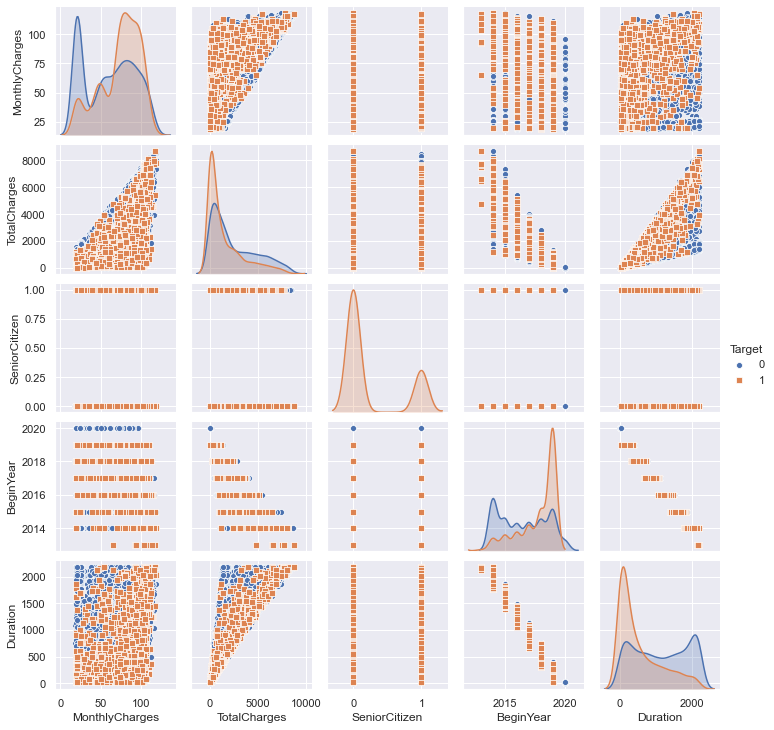

In [22]:
sns.set(style="darkgrid")
sns.pairplot(full_data,
             hue="Target",
             markers=["o", "s"],
             diag_kind="kde",
             height=1.5,
             size=2)
#Посмотрим на распределения наших данных, для этого построим pairplot

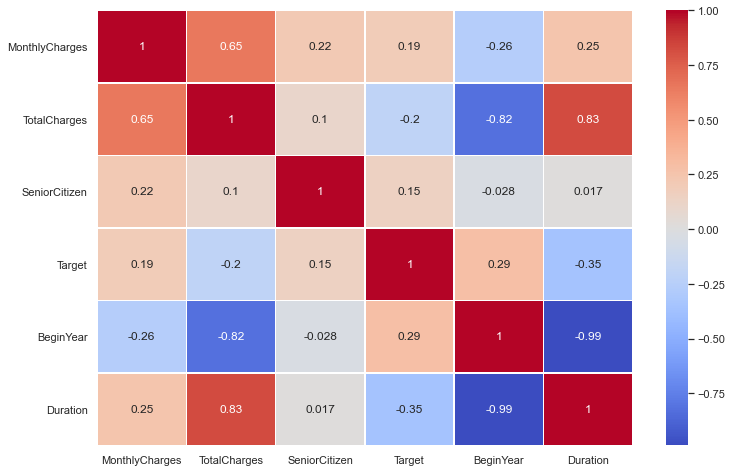

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(full_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
#Так же посмотрим на корреляцию Пирсона по числовым столбцам, отобразим ее через гистограмму heatmap

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Распределение в наших данных не является нормальным, больше похоже на распределение Пуассона, со смещением в лево.Коррелируют у нас столбец TotalCharges с продолжительностью дейсвия договора и со столбцом MonthlyCharges, и так же есть корреляци между столбцом BeginYear с продолжительностью дейсвия договора и со столбцом TotalCharges. Принимаем решение удалить столбцы TotalCharges и BeginYear перед подбором моделей.

<a href='#0.0'>Содержание'</a>

### Часть 2. Анализ данных <a id='2.0'></a>

#### 2.1 Анализ действующих клиентов и отключенных клиентов <a id='2.1'></a>

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

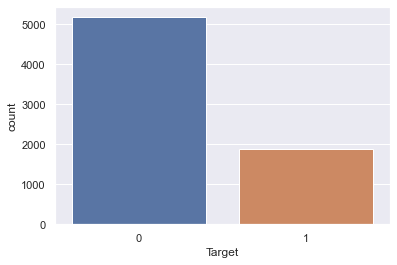

In [24]:
display(contract['EndDate'].value_counts())
sns.countplot(x='Target', data=full_data)
#Посмотрим на количество действующих клиентов и отключенных клиентов (дисбаланс)

In [25]:
def vizual(column):
    table = full_data.pivot_table(index=column,
                                  columns=['Target'],
                                  values='MonthlyCharges',
                                  aggfunc='count')
    display(table)
    table.plot(kind='bar', figsize=(8, 4))
#Так как анализ будет подразумевать однотипную визуализацию сводных таблиц создадим функцию, которая создаст сводную таблицу и барный график

Target,0,1
BeginYear,,
2013,NaN,8.0
2014,1246.0,98.0
2015,729.0,123.0
2016,618.0,145.0
2017,646.0,199.0
2018,715.0,315.0
2019,976.0,981.0
2020,244.0,NaN


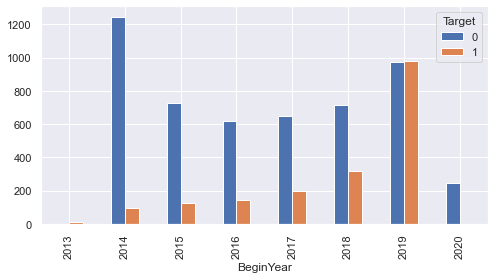

In [26]:
vizual('BeginYear')

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>В ходе анализа видим, что дейсвующих клиентов у нас больше чем отключенных(имеем дисбаланс целевого признака) и так же видим, что основной отток клиентов пришелся на 2019 год в последние месяцы. Заказчику нужно проанализировать детально 2019 год.

#### 2.2 Исследование платежей  действующих клиентов и отключенных клиентов  <a id='2.2'></a>

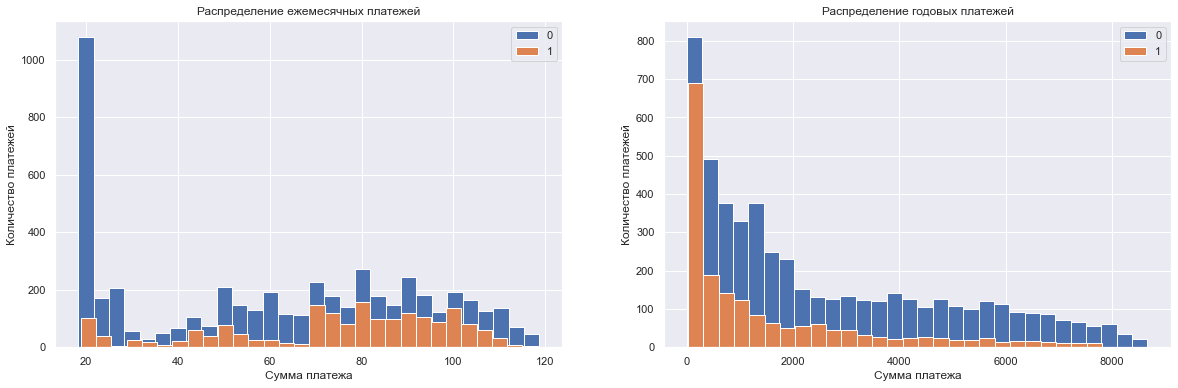

In [27]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121)
ax1 = full_data.groupby('Target')['MonthlyCharges'].plot(
    kind='hist',
    bins=30,
    legend=True,
)
plt.title("Распределение ежемесячных платежей")
plt.xlabel('Сумма платежа')
plt.ylabel('Количество платежей')
ax2 = fig.add_subplot(122)
ax2 = full_data.groupby('Target')['TotalCharges'].plot(
    kind='hist',
    bins=30,
    legend=True,
)
plt.title("Распределение годовых платежей")
plt.xlabel('Сумма платежа')
plt.ylabel('Количество платежей')
plt.legend()
plt.show()
#Посмотрим на распределение ежемесячных платежей и годовых платежей,для этого сгруппируем по целевому признаку и выведим гистограмы

Target,0,1
Type,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


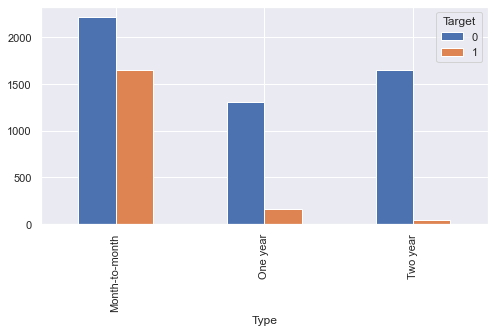

In [28]:
vizual('Type')
# Так же применим функцию визуализации к столбцу Type

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Как видим, у нас основная часть ушедших клиентов заключали договор с ежемесячной оплатой и видим, что ушедшие клиенты платили маленькие платежи.

#### 2.3  Анализ клиентов по способу оплаты  услуги <a id='2.3'></a>

Target,0,1
PaperlessBilling,,
No,2403,469
Yes,2771,1400


Target,0,1
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


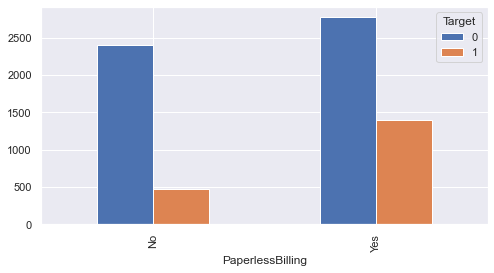

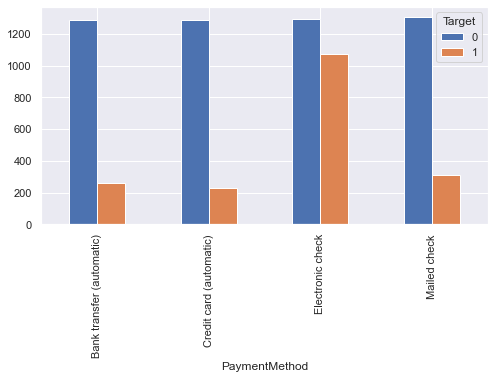

In [29]:
vizual('PaperlessBilling')
vizual('PaymentMethod')
#Применим функцию визуализации к столбцу PaperlessBilling и PaymentMethod, посмотрим тип и метод оплаты клиентов.

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Большинство ушедшие клиенты использовало электронный способ оплаты, их почти в 4 раза больше, чем ушедших клиентов использующих бумажный способ оплаты. И мы видим, что большинство ушедших клиентов использующих электронный способ оплаты оплачивали по электронному чеку. Возможно есть проблемы с формированием это лектронного чека.

#### 2.4  Анализ количества используемых линий стационнарной связи <a id='2.4'></a>

Target,0,1
MultipleLines,,
No,3053,1019
Yes,2121,850


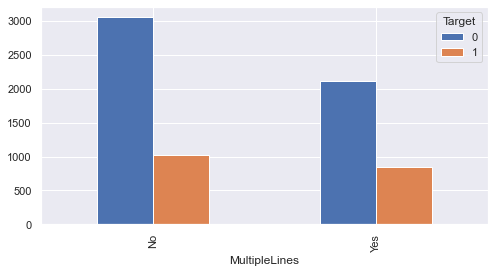

In [30]:
vizual('MultipleLines')

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>В данном столбце нет явных отклонений в количесве ушедших и дейсвующих клиентов.

#### 2.5  Исследование количества интернет подключения(Fiber optic or DSL) <a id='2.5'></a>

Target,0,1
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


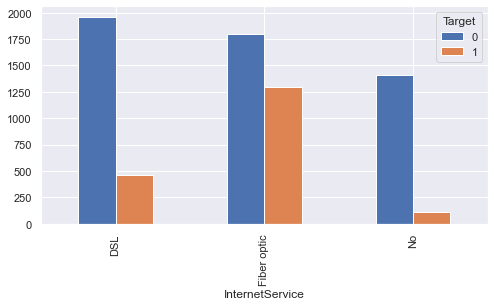

In [31]:
vizual('InternetService')

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>В основном клиенты которые отключились от оператора, были подключенны через оптический провод. Думаю это просто связано с тем, что большинство таких клиентов использовали интернет услуги, а технология оптического подключения более современная и с этим связан рост показателя, но возможно и технические проблеммы в этом способе оплаты.

#### 2.6 Анализ взаимосвязи между отключенными клиентами и Интернет-безопасность,TechSupport,OnlineBackup,StreamingTV,StreamingMovies  <a id='2.6'></a>

Target,0,1
TechSupport,,
No,3440,1559
Yes,1734,310


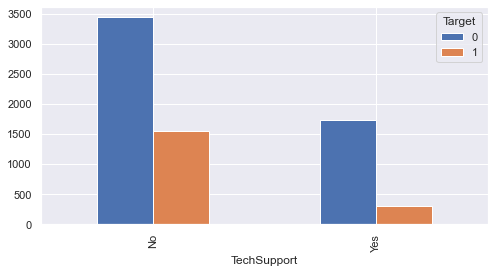

In [32]:
vizual('TechSupport')

Target,0,1
OnlineBackup,,
No,3268,1346
Yes,1906,523


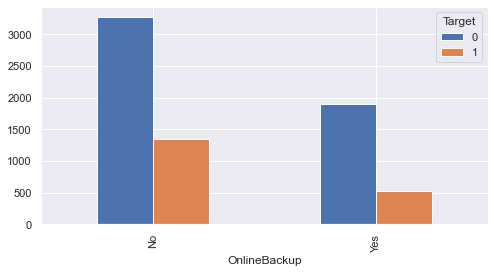

In [33]:
vizual('OnlineBackup')

Target,0,1
OnlineSecurity,,
No,3450,1574
Yes,1724,295


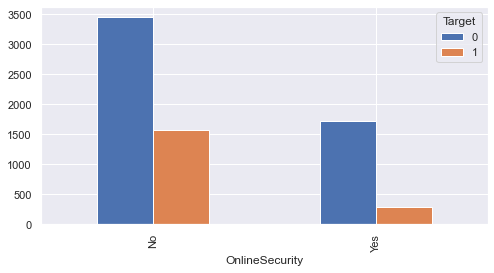

In [34]:
vizual('OnlineSecurity')

Target,0,1
DeviceProtection,,
No,3297,1324
Yes,1877,545


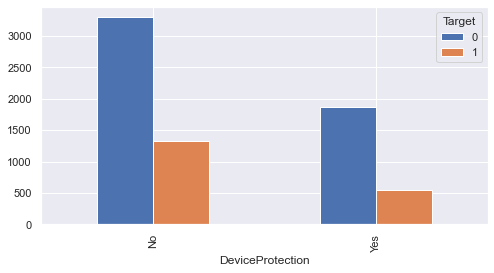

In [35]:
vizual('DeviceProtection')

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Как видим большинство отключенных клиентов не использовали услугу технической поддержки, онлайн безопасности, онлайн резервного копирования, защиту устройств и технической поддержки. Заказчик может предложить данные услуги клиентам, которые планируют уйти.

<a href='#0.0'>Содержание'</a>

### Часть 3. Построение модели <a id='3.0'></a>

#### 3.1 Создание признаков(target and features), кодирование и масштабирование признаков, балансировка, разделение данных, создание новых, удаление ненужных. <a id='3.1'></a>

In [36]:
# Удалим столбцы, которые ни как не повлияют на проводимый анализ, для оптимизации датасета
full_data = full_data.drop(['TotalCharges', 'BeginYear', 'BeginYear'], axis=1)

In [37]:
# Применим технику прямого кодирования ОНЕ, используем функцию pd.get_dummies(), чтобы не угодить в ловушку фиктивных признаков
# удалим первые столбцы методом drop_first
data_ohe = pd.get_dummies(full_data, drop_first=True)
display(data_ohe.head())
# Сохраним для выборки данные в отдельных переменных. Объявите две переменные:
# features — запишите в неё признаки; target — целевой признак.
target = data_ohe['Target']
features = data_ohe.drop('Target', axis=1)

,MonthlyCharges,SeniorCitizen,Target,Duration,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,29.85,0,0,31,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,56.95,0,0,1036,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,53.85,0,1,61,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,0,0,1371,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,70.70,0,1,61,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
rs = 12345
#создадим константную переменную

In [39]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.30, random_state=rs)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.50, random_state=rs)
# Разделим нашу таблицу с данными на целевой признак и остальные признаки в соотношении 75/25
display('Размер обучающей выборки: {} объектов, {} признаков'.format(
    features_train.shape[0], features_train.shape[1]))
display('Размер валидационной выборки: {} объектов, {} признаков'.format(
    features_valid.shape[0], features_valid.shape[1]))
display('Размер тестовой выборки: {} объектов, {} признаков'.format(
    features_test.shape[0], features_test.shape[1]))
# Размеры обучающей и тестовой выборки

'Размер обучающей выборки: 4930 объектов, 21 признаков'

'Размер валидационной выборки: 1056 объектов, 21 признаков'

'Размер тестовой выборки: 1057 объектов, 21 признаков'

In [40]:
# Провеем стандартизацию данных методом StandardScaler
# Создадим объект этой структуры и настроим его на обучающих данных.
numeric = [
    'MonthlyCharges',
    'Duration',
]
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# Преобразуем обучающую и валидационную выборки функцией transform
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [41]:
display(features_train.head())

,MonthlyCharges,SeniorCitizen,Duration,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
99,1.115250,1,-0.315282,0,0,1,0,1,0,0,...,0,1,0,0,1,1,0,1,1,0
5684,1.346920,1,1.033322,1,0,1,1,0,0,0,...,0,1,0,1,1,0,1,1,1,0
4627,1.714281,0,1.115259,1,0,1,1,0,0,1,...,0,1,0,1,1,1,1,1,1,1
629,0.835592,1,0.665277,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,1
4084,0.438444,0,-1.295840,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [42]:
# Создадим функцию для улучшения качества модели, чтобы сбалансировать классы путем увеличения обьектов класса - техникой upsample
def upsample(features, target, repeat):
    features_zeros = features[target == 0] # разделим обучающую  выборку на положительную и отрицательную
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
# скопируем несколько раз обьекты и соединим функцией pd.concat() в новые переменные.
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
# перемешаем обьекты случайным образом функцией  shuffle().   
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=rs)
# на выходе получим новые выборки    
    return features_upsampled, target_upsampled


In [43]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)
display('Размер обучающей выборки: {} объектов, {} признаков'.format(
    features_upsampled.shape[0], features_upsampled.shape[1]))

'Размер обучающей выборки: 7520 объектов, 21 признаков'

In [44]:
target_upsampled.value_counts()

1    3885
0    3635
Name: Target, dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>В ходе процедуры создания признаков удалили стобцы 'TotalCharges', 'BeginYear', 'BeginYear' - так как они очень сильно коррелировали.Применили технику прямого кодирования ОНЕ и получили 22 столбца, отделили целевой признак от остальных и разделили нашу выборку на обучающую и валидационную и тестовую. Так же провели стандартизацию данных методом StandardScaler. 
Для борьбы с дисбалансом применили техникой upsample для увеличения обьектов класса. Размер такой выборки составил 7520 обьектов.

#### 3.2 Определение метрик, обучение разных моделей, подбор гиперпараметров и оценка их качества кросс-валидацией <a id='3.2'></a>

In [45]:
#Создадим функцию для применения способа GridSearchCV для нахождения и сохранения лучших параметров модели
def best_parameters(Regressor, features, target, param):
    model = GridSearchCV(estimator=Regressor,
                         param_grid=param,
                         cv=3,
                         n_jobs=-1)
    model.fit(features, target)
    result = model.score(features_valid, target_valid)
    predicted_valid = model.predict(features_valid)
    # получим метрику качества модели на валидационной выборке
    display("Качество модели на валидационной выборке: {:.4f}".format(result))
    probabilities_test = model.predict_proba(features_valid)
    probabilities_one_test = probabilities_test[:, 1]
    #выведим основные метрики и лучшие гиперпараметры
    display("Оценка ROC-AUC: {:.4f}".format(
        roc_auc_score(target_valid, probabilities_one_test)))
    display("Полнота: {:.4f}".format(
        recall_score(target_valid, predicted_valid)))
    display("Точность: {:.4f}".format(
        precision_score(target_valid, predicted_valid)))
    display(f'Лучшие параметры: {model.best_params_}')
    return model.best_estimator_

In [46]:
# Создадим функцию для вывода матрицы неточности моделей
def matrix(model, features, target):
    fig = plt.figure(figsize=(8, 2))
    pred = model.predict(features)
    cm = confusion_matrix(target, pred)
    sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.7, fmt='.0f')
    plt.title('Матрица неточностей')
    plt.ylabel('Целевой признак')
    plt.xlabel('Предсказания')
    plt.show()

In [47]:
# Создадим функцию для вывода матрицы неточности моделей
def matrix_1(model_1,model_2,features, target):
    fig = plt.figure(figsize=(20, 4))
    fig.add_subplot(121)
    pred_1 = model_1.predict(features)
    cm_1 = confusion_matrix(target, pred_1)
    sns.heatmap(cm_1, annot=True, cmap='coolwarm', linewidths=0.7, fmt='.0f')
    plt.title('Матрица неточностей с несбалансированными данными')
    plt.ylabel('Целевой признак')
    plt.xlabel('Предсказания')
    fig.add_subplot(122)
    pred_2 = model_2.predict(features)
    cm_2 = confusion_matrix(target, pred_2)
    sns.heatmap(cm_2, annot=True, cmap='coolwarm', linewidths=0.7, fmt='.0f')
    plt.title('Матрица неточностей с сбалансированными данными')
    plt.ylabel('Целевой признак')
    plt.xlabel('Предсказания')

In [48]:
# Создадим функцию для нахождения и сохранения метрики качества и оценки ROC_AUC на тестовой выборке
def score(model, features, target):
    pred = model.predict(features)
    prob = model.predict_proba(features)
    prob_one = prob[:, 1]
    acc = accuracy_score(target, pred)
    roc_auc = roc_auc_score(target, prob_one)
    display(f'Метрики качества модели accuracy: {acc:.4f}')
    display(f"Оценка ROC-AUC: {roc_auc:.4f}")
    return acc, roc_auc

In [49]:
# создадим функцию, которая выводит график влияния признаков на предсказание модели
def importances(model_1,model_2):
    fig = plt.figure(figsize=(20, 10))
    fig.add_subplot(211)
    columns_forest = features_train.columns
    importance_forest = model_1.feature_importances_
    plt.bar(columns_forest,importance_forest)
    plt.xticks([])
    plt.title("График влияния признаков на предсказание для несбалансированных данных")
    plt.xlabel('Признаки')
    plt.ylabel('Степень влияния на предсказания')
    fig.add_subplot(212)
    columns_forest = features_train.columns
    importance_forest = model_2.feature_importances_
    plt.bar(columns_forest,importance_forest)
    plt.xticks(rotation=90)
    plt.title("График влияния признаков на предсказание для сбалансированных данных")
    plt.xlabel('Признаки')
    plt.ylabel('Степень влияния на предсказания')

In [50]:
# Запишем параметры,которые мы хотим перебрать для разных моделей в отдельные переменные
param_forest = {
    'n_estimators': range(10, 110, 10),
    'max_depth': range(1, 11, 2),
    'min_samples_leaf': range(2, 8, 2)
}
param_KNC = {
    'n_neighbors': range(5, 80, 5),
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}
param_log = {'solver': ['liblinear']}
param_GBC = {
    'n_estimators': range(40, 200, 20),
    'max_depth': range(2, 11, 2),
    'learning_rate': [0.01, 0.1, 0.5]
}
param_catboost = {
    'depth': range(2, 11, 2),
    'n_estimators': range(50, 200, 20),
    'learning_rate': [0.01, 0.1, 0.5],
}

#### Для нашей задачи классификации мы выбрали 5 моделей: 
- Логистическая регрессия - со стандартным параметром регулирезации L2 - ridge
- Случайный лес
- Градиентный бустинг 
- Метод ближайших соседей
- Модель CatBoostClassifier

#### Проведем обучение модели на выборке с несбалансированными данными

In [51]:
display('Модель LogisticRegression:')
model_log = best_parameters(LogisticRegression(), features_train, target_train, param_log)

'Модель LogisticRegression:'

'Качество модели на валидационной выборке: 0.8068'

'Оценка ROC-AUC: 0.8377'

'Полнота: 0.5480'

'Точность: 0.6667'

"Лучшие параметры: {'solver': 'liblinear'}"

In [52]:
display('Модель RandomForestClassifier:')
model_forest = best_parameters(RandomForestClassifier(random_state=rs),
                               features_train, target_train, param_forest)

'Модель RandomForestClassifier:'

'Качество модели на валидационной выборке: 0.8267'

'Оценка ROC-AUC: 0.8601'

'Полнота: 0.5516'

'Точность: 0.7311'

"Лучшие параметры: {'max_depth': 9, 'min_samples_leaf': 4, 'n_estimators': 30}"

In [53]:
display('Модель GradientBoostingClassifier:')
model_gbc = best_parameters(GradientBoostingClassifier(random_state=rs),
                            features_train, target_train, param_GBC)

'Модель GradientBoostingClassifier:'

'Качество модели на валидационной выборке: 0.8835'

'Оценка ROC-AUC: 0.9285'

'Полнота: 0.6904'

'Точность: 0.8435'

"Лучшие параметры: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 180}"

In [54]:
display('Модель KNeighborsClassifier:')
model_knc = best_parameters(KNeighborsClassifier(), features_train,
                            target_train, param_KNC)

'Модель KNeighborsClassifier:'

'Качество модели на валидационной выборке: 0.7973'

'Оценка ROC-AUC: 0.8319'

'Полнота: 0.5552'

'Точность: 0.6367'

"Лучшие параметры: {'n_neighbors': 40, 'p': 2, 'weights': 'uniform'}"

In [55]:
display('Модель CatBoostClassifier:')
model_catboost = best_parameters(
    CatBoostClassifier(random_state=rs,
                       verbose=False,
                       loss_function='CrossEntropy'), features_train,
    target_train, param_catboost)

'Модель CatBoostClassifier:'

'Качество модели на валидационной выборке: 0.8854'

'Оценка ROC-AUC: 0.9219'

'Полнота: 0.6833'

'Точность: 0.8571'

"Лучшие параметры: {'depth': 2, 'learning_rate': 0.5, 'n_estimators': 190}"

#### Проведем обучение модели на выборке с балансированными данными (upsampled)

In [56]:
display('Модель LogisticRegression для увеличенной выборки upsample:')
model_log_upsampled = best_parameters(LogisticRegression(), features_upsampled, target_upsampled, param_log)

'Модель LogisticRegression для увеличенной выборки upsample:'

'Качество модели на валидационной выборке: 0.7377'

'Оценка ROC-AUC: 0.8374'

'Полнота: 0.7936'

'Точность: 0.5045'

"Лучшие параметры: {'solver': 'liblinear'}"

In [57]:
display('Модель RandomForestClassifier для увеличенной выборки upsample:')
model_forest_upsampled = best_parameters(RandomForestClassifier(random_state=rs),
                               features_upsampled, target_upsampled, param_forest)

'Модель RandomForestClassifier для увеличенной выборки upsample:'

'Качество модели на валидационной выборке: 0.7642'

'Оценка ROC-AUC: 0.8554'

'Полнота: 0.8149'

'Точность: 0.5376'

"Лучшие параметры: {'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 100}"

In [58]:
display('Модель GradientBoostingClassifier для увеличенной выборки upsample:')
model_gbc_upsampled = best_parameters(GradientBoostingClassifier(random_state=rs),
                               features_upsampled, target_upsampled, param_GBC)

'Модель GradientBoostingClassifier для увеличенной выборки upsample:'

'Качество модели на валидационной выборке: 0.8741'

'Оценка ROC-AUC: 0.9092'

'Полнота: 0.7189'

'Точность: 0.7891'

"Лучшие параметры: {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 180}"

In [59]:
display('Модель KNeighborsClassifier для увеличенной выборки upsample:')
model_knc_upsampled = best_parameters(KNeighborsClassifier(),
                               features_upsampled, target_upsampled, param_KNC)

'Модель KNeighborsClassifier для увеличенной выборки upsample:'

'Качество модели на валидационной выборке: 0.6866'

'Оценка ROC-AUC: 0.7714'

'Полнота: 0.7438'

'Точность: 0.4466'

"Лучшие параметры: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}"

In [60]:
display('Модель CatBoostClassifier для увеличенной выборки upsample:')
model_catboost_upsampled = best_parameters(
    CatBoostClassifier(random_state=rs,
                       verbose=False,
                       loss_function='CrossEntropy'), features_upsampled,
    target_upsampled, param_catboost)

'Модель CatBoostClassifier для увеличенной выборки upsample:'

'Качество модели на валидационной выборке: 0.8636'

'Оценка ROC-AUC: 0.9128'

'Полнота: 0.7651'

'Точность: 0.7338'

"Лучшие параметры: {'depth': 6, 'learning_rate': 0.5, 'n_estimators': 190}"

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>

#### В ходе подбора гиперпараметров для моделей классификаций с несбалансированными данными мы получили лучшие метрики:
- Градиентный бустинг - при качестве модели на валидационной выборке: 0.8835 и Оценка ROC-AUC: 0.9285
- Модель CatBoostClassifier - при качестве модели на валидационной выборке: 0.8854 и Оценка ROC-AUC: 0.9219

#### В ходе подбора гиперпараметров для моделей классификаций с сбалансированными данными мы получили лучшие метрики:
- Градиентный бустинг - при качестве модели на валидационной выборке: 0.8741 и Оценка ROC-AUC: 0.9092
- Модель CatBoostClassifier - при качестве модели на валидационной выборке: 0.8636 и Оценка ROC-AUC: 0.9128

Так же мы видим, что на сбалансированных данных у наших моделей метрики точности и полноты более равномерно поднимаются, но падает качество и оценка ROC-AUC, тогда как в моделях на несбалансированных данных у нас растет качество и оценка ROC-AUC, но падает полнота и растет точность.

#### 3.3 Проверка лучшей модели на адекватность и тестирование лучшей модели. <a id='3.3'></a>

In [61]:
#Создадим дамми модель для проверки адекватности (константная модель)
dummy = DummyClassifier(strategy='most_frequent').fit(features_train,
                                                      target_train)
dummy_pred = dummy.predict(features_valid)
dummy_acc = accuracy_score(target_valid, dummy_pred)
display("Качество модели фиктивного метода: {:.4f}".format(dummy_acc))
probabilities_dummy = dummy.predict_proba(features_valid)
probabilities_one_dummy = probabilities_dummy[:, 1]
roc_auc_dummy = roc_auc_score(target_valid, probabilities_one_dummy)
display("Оценка ROC-AUC: {:.4f}".format(roc_auc_dummy))

'Качество модели фиктивного метода: 0.7339'

'Оценка ROC-AUC: 0.5000'

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Наши модели прошли тест на адекватность,как видим дамми модель унас выдала качетво модели ниже чем все наши модели.

### Проведем финальную проверку на тестовой выборке, модели обученны на двух выборках, посмотрим на матрицу неточностей наших моделей.

'Модель LogisticRegression на тестовой выборке:'

'Метрики качества модели accuracy: 0.7871'

'Оценка ROC-AUC: 0.8303'

'Модель LogisticRegression для увеличенной тестовой выборк upsample:'

'Метрики качества модели accuracy: 0.7323'

'Оценка ROC-AUC: 0.8308'

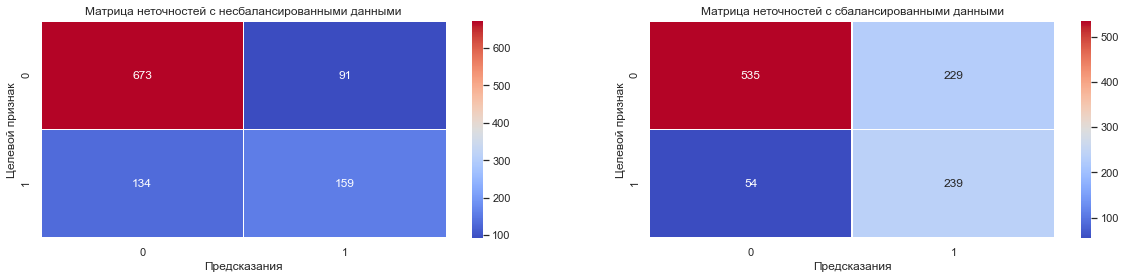

In [62]:
display('Модель LogisticRegression на тестовой выборке:')
acc_log, roc_log = score(model_log, features_test, target_test)
display('Модель LogisticRegression для увеличенной тестовой выборк upsample:')
acc_log_up, roc_log_up = score(model_log_upsampled, features_test, target_test)
matrix_1(model_log, model_log_upsampled, features_test, target_test)

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Логистическая регрессия дает одинаковые результаты на разных выборках, дисбаланс классов не влияют на эту модель. матрица неточностей показывает, что модель предсказывает ушедших клиентов 239 раз и ошибается 54 раза

'Модель RandomForestClassifier на тестовой выборке:'

'Метрики качества модели accuracy: 0.7881'

'Оценка ROC-AUC: 0.8435'

'Модель RandomForestClassifier для увеличенной тестовой выборк upsample:'

'Метрики качества модели accuracy: 0.7436'

'Оценка ROC-AUC: 0.8402'

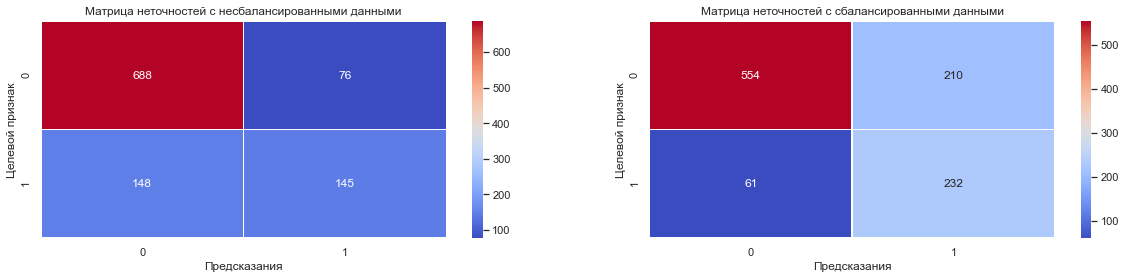

In [63]:
display('Модель RandomForestClassifier на тестовой выборке:')
acc_forest, roc_forest = score(model_forest, features_test, target_test)
display('Модель RandomForestClassifier для увеличенной тестовой выборк upsample:')
acc_forest_up, roc_forest_up = score(model_forest_upsampled, features_test, target_test)
matrix_1(model_forest, model_forest_upsampled, features_test, target_test)

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Модель случайнго леса дает разные результаты на разных выборках. Матрица неточностей показывает, что модель предсказывает ушедших клиентов 232 раза и ошибается 61 раза, на несбалансированных данных модель ошибается 148 раз

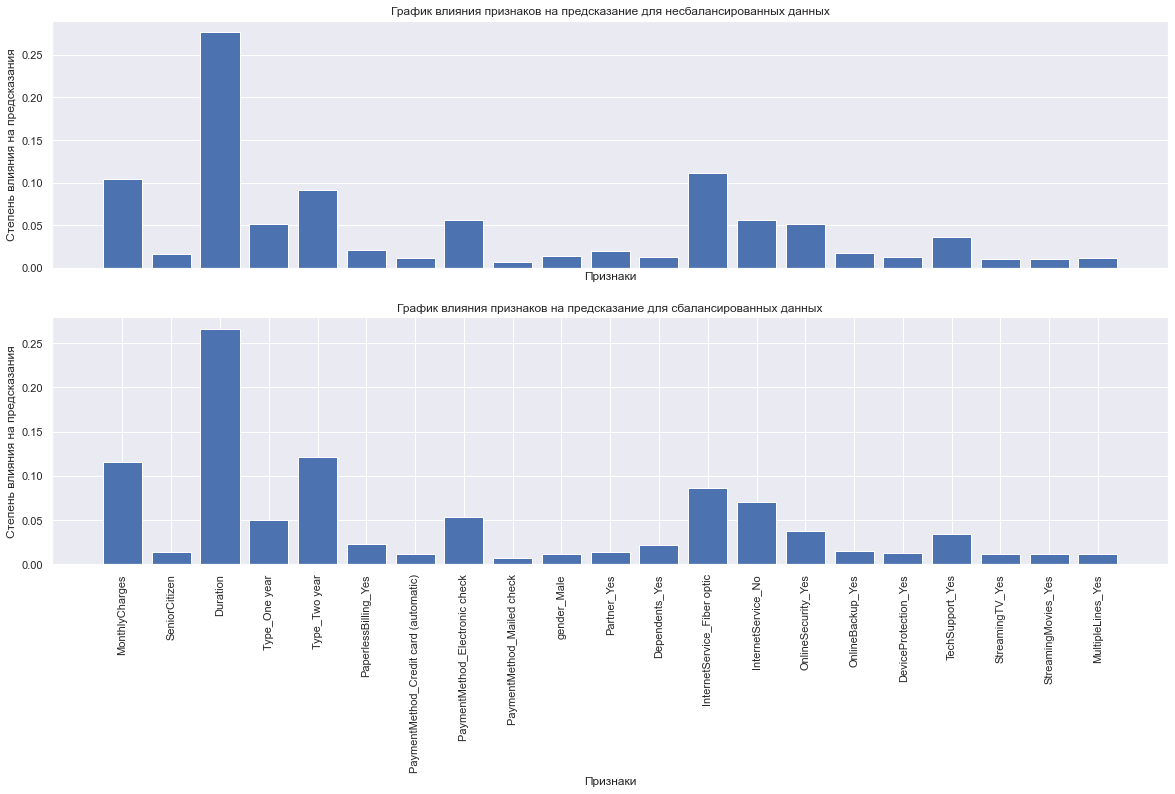

In [64]:
# Построим график влияния признаков на предсказание модели для двух выборок
importances(model_forest,model_forest_upsampled)

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>На предсказание модели случайнго леса влияют почти все признаки, есть определенные лидеры как видно на графике и разницы между графиками разных выборок особо нет.

'Модель KNeighborsClassifier на тестовой выборке:'

'Метрики качества модели accuracy: 0.7729'

'Оценка ROC-AUC: 0.8215'

'Модель KNeighborsClassifier для увеличенной тестовой выборк upsample:'

'Метрики качества модели accuracy: 0.7058'

'Оценка ROC-AUC: 0.7831'

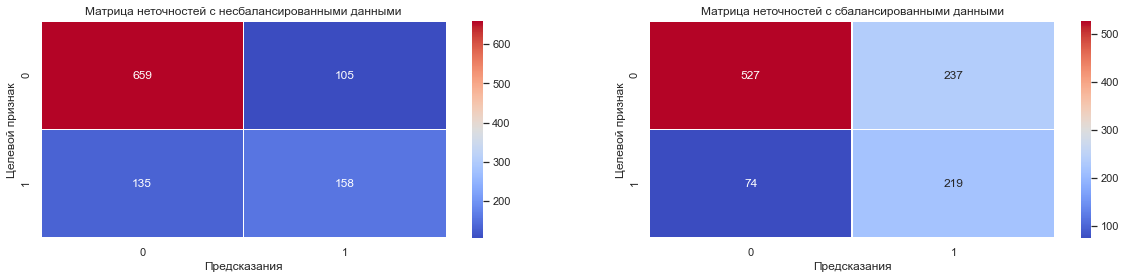

In [65]:
display('Модель KNeighborsClassifier на тестовой выборке:')
acc_knc, roc_knc = score(model_knc, features_test, target_test)
display('Модель KNeighborsClassifier для увеличенной тестовой выборк upsample:')
acc_knc_up, roc_knc_up = score(model_knc_upsampled, features_test, target_test)
matrix_1(model_knc, model_knc_upsampled, features_test, target_test)

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Модель метода ближайших соседей дает разные результаты на разных выборках. Матрица неточностей показывает, что модель предсказывает ушедших клиентов 219 раза и ошибается 74 раза, на несбалансированных данных модель ошибается 135 раз

'Модель GradientBoostingClassifier на тестовой выборке:'

'Метрики качества модели accuracy: 0.8713'

'Оценка ROC-AUC: 0.9242'

'Модель GradientBoostingClassifier для увеличенной тестовой выборк upsampleе:'

'Метрики качества модели accuracy: 0.8448'

'Оценка ROC-AUC: 0.8885'

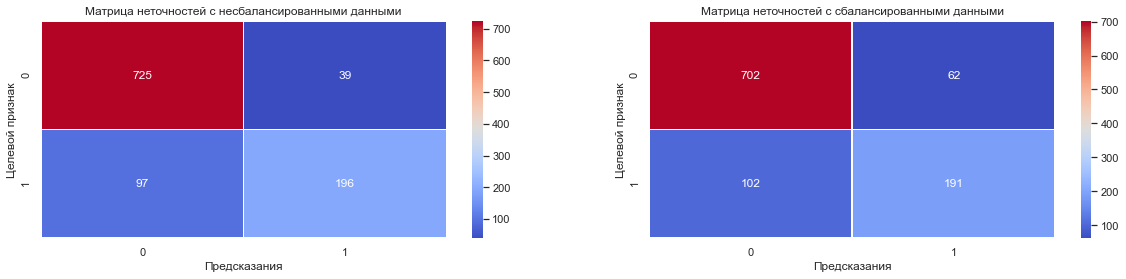

In [66]:
display('Модель GradientBoostingClassifier на тестовой выборке:')
acc_gbc, roc_gbc = score(model_gbc, features_test, target_test)
display('Модель GradientBoostingClassifier для увеличенной тестовой выборк upsampleе:')
acc_gbc_up, roc_gbc_up = score(model_gbc_upsampled, features_test, target_test)
matrix_1(model_gbc, model_gbc_upsampled, features_test, target_test)

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Модель градиентного дустинга тоже дает разные результаты на разных выборках. Матрица неточностей показывает, что модель предсказывает ушедших клиентов 191 раза и ошибается 102 раза, на несбалансированных данных модель ошибается 97 раз

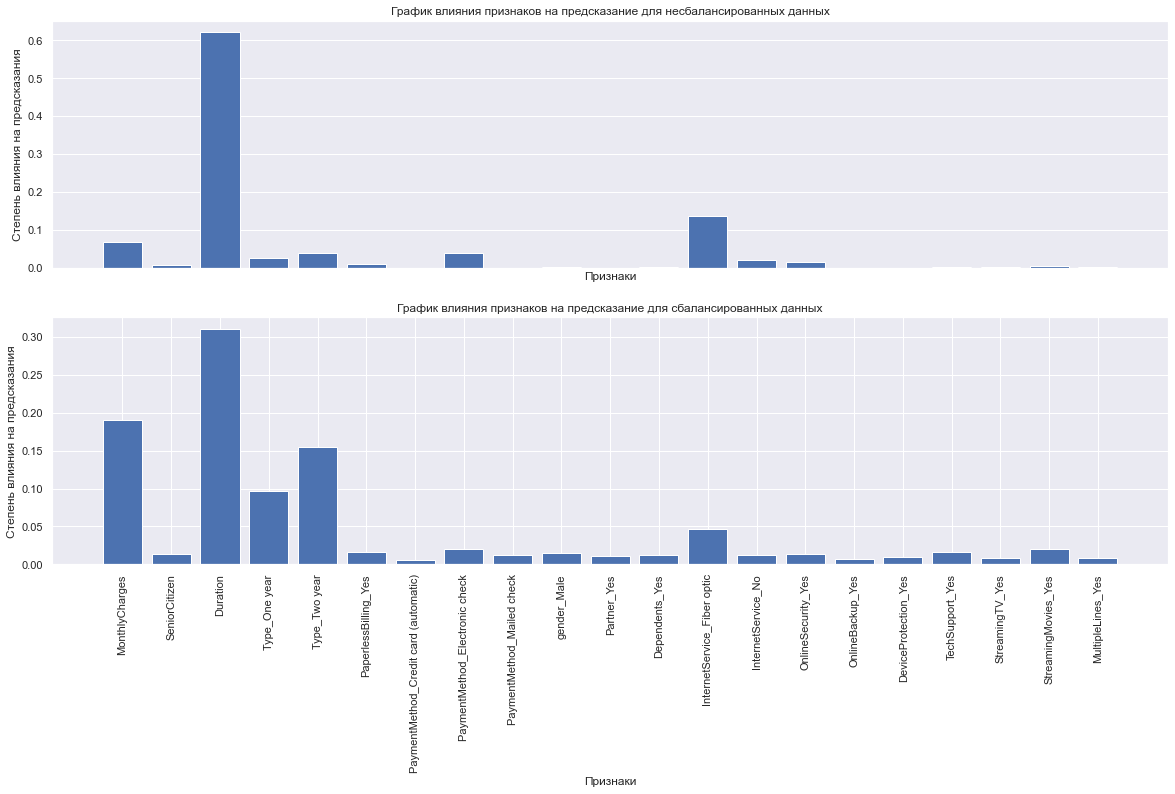

In [67]:
# Построим график влияния признаков на предсказание модели для двух выборок
importances(model_gbc, model_gbc_upsampled)

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>На предсказание модели градиентного спуска влияют 5 признаков, есть определенные лидеры как видно на графике и разницы между графиками разных выборок уже наблюдается.

'Модель CatBoostClassifier на тестовой выборке:'

'Метрики качества модели accuracy: 0.8628'

'Оценка ROC-AUC: 0.9203'

'Модель CatBoostClassifier для увеличенной тестовой выборк upsample:'

'Метрики качества модели accuracy: 0.8411'

'Оценка ROC-AUC: 0.8892'

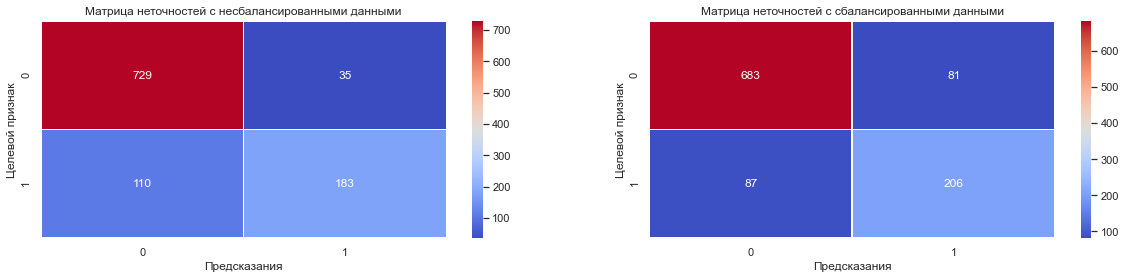

In [68]:
display('Модель CatBoostClassifier на тестовой выборке:')
acc_catboost, roc_catboost = score(model_catboost, features_test, target_test)
display('Модель CatBoostClassifier для увеличенной тестовой выборк upsample:')
acc_catboost_up, roc_catboost_up = score(model_catboost_upsampled, features_test, target_test)
matrix_1(model_catboost, model_catboost_upsampled, features_test, target_test)

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>Модель  catboost тоже дает разные результаты на разных выборках. Матрица неточностей показывает, что модель предсказывает ушедших клиентов 206 раза и ошибается 87 раз, на несбалансированных данных модель ошибается 110 раз

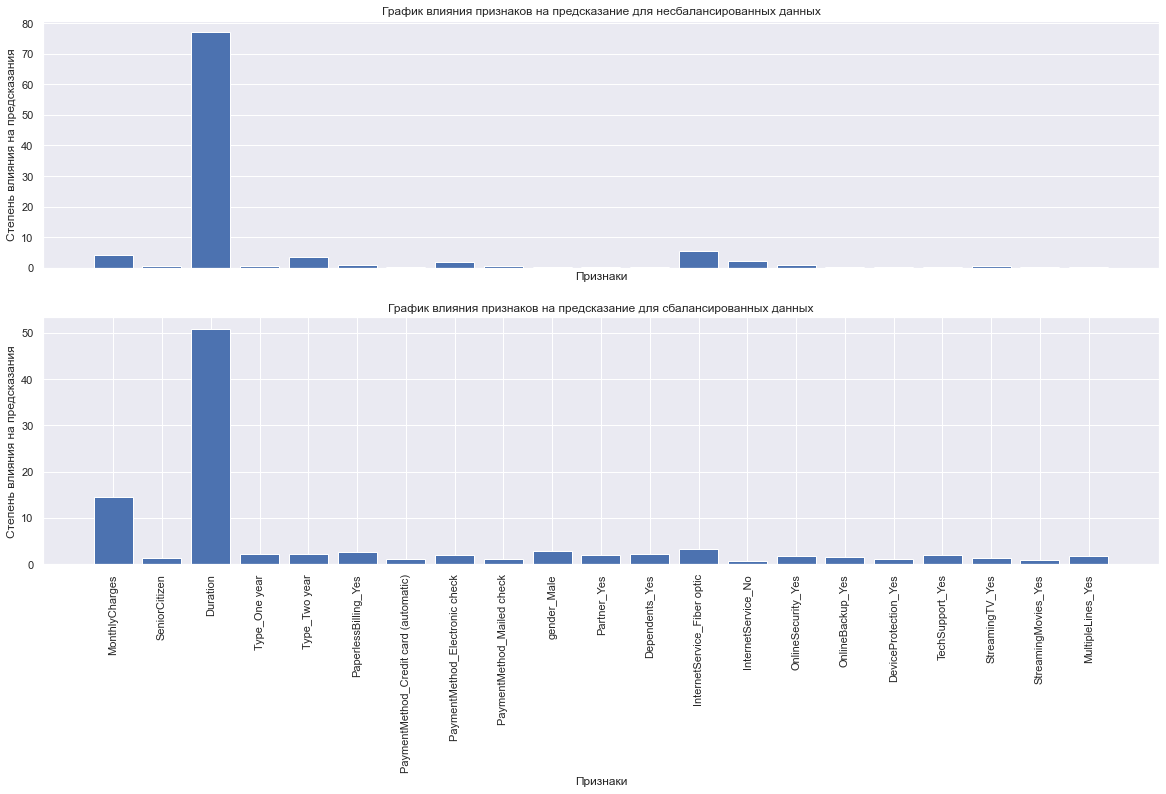

In [69]:
# Построим график влияния признаков на предсказание модели для двух выборок
importances(model_catboost, model_catboost_upsampled)

<div style="border:solid blue 2px; padding: 20px">
    
<font color='blue'>На предсказание модели градиентного спуска влияют 2 признака, есть определенные лидеры как видно на графике и разницы между графиками разных выборок уже наблюдается.

<a href='#0.0'>Содержание'</a>

### Часть 4. Вывод <a id='4.0'></a>

#### 4.1 Основные выводы полученные в ходе решения задачи  <a id='4.1'></a>

In [70]:
#Соберем все наши результаты в один датафрейм
result_all = pd.DataFrame({
    'Модели классификаций': [
        'Dummy',
        'LogisticRegression',
        'RandomForest',
        'KNeighborsClassifier',
        'GradientBoostingClassifier',
        'Catboost',
    ],
    'Метрика ACC': [
        dummy_acc,
        acc_log,
        acc_forest,
        acc_knc,
        acc_gbc,
        acc_catboost,
    ],
    'Оценка ROC-AUC':
    [roc_auc_dummy, roc_log, roc_forest, roc_knc, roc_gbc, roc_catboost],
    'ACC на увеличенной выборке': [
        dummy_acc,
        acc_log_up,
        acc_forest_up,
        acc_knc_up,
        acc_gbc_up,
        acc_catboost_up,
    ],
    'ROC-AUC на увеличенной выборке': [
        roc_auc_dummy, roc_log_up, roc_forest_up, roc_knc_up, roc_gbc_up,
        roc_catboost_up
    ]
})

'Таблица результатов сортированная по несбалансированным данным'

,Модели классификаций,Метрика ACC,Оценка ROC-AUC,ACC на увеличенной выборке,ROC-AUC на увеличенной выборке
4,GradientBoostingClassifier,0.871334,0.924166,0.844844,0.888507
5,Catboost,0.862819,0.920278,0.841060,0.889248
2,RandomForest,0.788079,0.843546,0.743614,0.840216
1,LogisticRegression,0.787133,0.830325,0.732261,0.830812
3,KNeighborsClassifier,0.772942,0.821474,0.705771,0.783116
0,Dummy,0.733902,0.500000,0.733902,0.500000


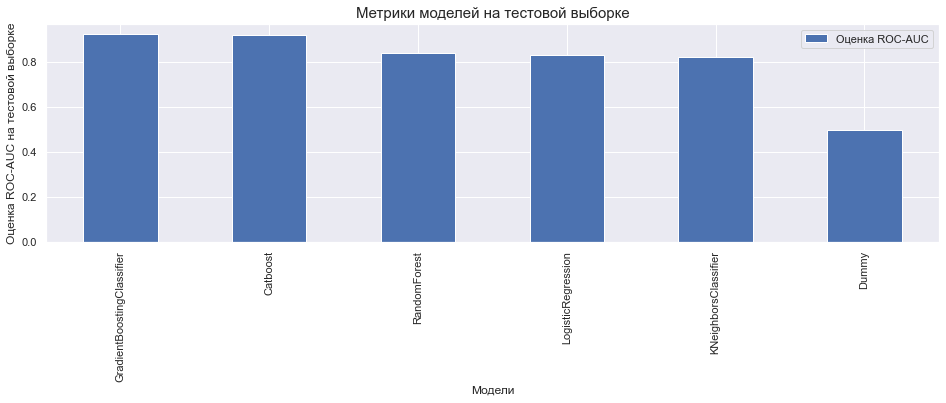

'Таблица результатов сортированная по сбалансированным данным'

,Модели классификаций,Метрика ACC,Оценка ROC-AUC,ACC на увеличенной выборке,ROC-AUC на увеличенной выборке
5,Catboost,0.862819,0.920278,0.841060,0.889248
4,GradientBoostingClassifier,0.871334,0.924166,0.844844,0.888507
2,RandomForest,0.788079,0.843546,0.743614,0.840216
1,LogisticRegression,0.787133,0.830325,0.732261,0.830812
3,KNeighborsClassifier,0.772942,0.821474,0.705771,0.783116
0,Dummy,0.733902,0.500000,0.733902,0.500000


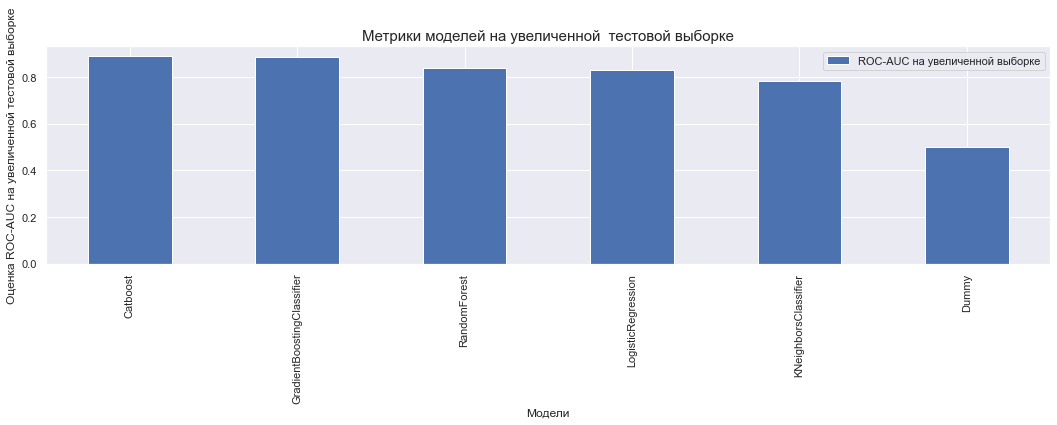

In [71]:
display('Таблица результатов сортированная по несбалансированным данным')
result = result_all.sort_values(by='Оценка ROC-AUC', ascending=False)
display(result)
result.plot(x='Модели классификаций',
            y='Оценка ROC-AUC',
            kind='bar',
            figsize=(16, 4))
plt.xlabel('Модели')
plt.ylabel('Оценка ROC-AUC на тестовой выборке')
plt.title('Метрики моделей на тестовой выборке', size=15)
plt.show();
#Отсортируем таблицу для выборки с несбалансированными данными по убыванию
display('Таблица результатов сортированная по сбалансированным данным')
result_upsample = result_all.sort_values(by='ROC-AUC на увеличенной выборке',
                                         ascending=False)
display(result_upsample)
result_upsample.plot(x='Модели классификаций',
                     y='ROC-AUC на увеличенной выборке',
                     kind='bar',
                     figsize=(18, 4))
plt.xlabel('Модели')
plt.ylabel('Оценка ROC-AUC на увеличенной тестовой выборке')
plt.title('Метрики моделей на увеличенной  тестовой выборке', size=15)
plt.show();
#Отсортируем таблицу для выборки с сбалансированными данными по убыванию

'Оценка ROC-AUC: 0.8885'

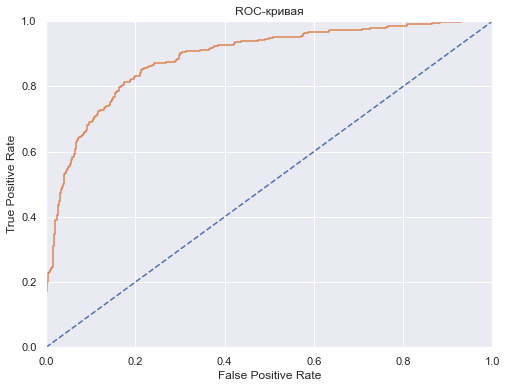

In [72]:
# сравним нашу метрику с площадью под ROC-кривой,
probabilities_test = model_gbc_upsampled.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
display("Оценка ROC-AUC: {:.4f}".format(
    roc_auc_score(target_test, probabilities_one_test)))
# чтобы определить как сильно наша модель отличается от случайной модели
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
# Построим график ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1],
         linestyle='--')  # ROC-кривая случайной модели (выглядит как прямая)
plt.plot(
    fpr,
    tpr,
)
plt.ylim([0.0, 1.0])  #   установить границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

## Выводы:
### <span style="color:blue">В ходе исследования нами было сделано:
- Ознакомление с данными - составлен план исследования, проверка данных на наличие пропусков, аномалий, дубликатов, иследование типов данных и визуальное ознакомление.
- Объеденили полученные выгрузки от заказчика в один датасет
- В ходе предобработки мы создали дополнительные столбцы. Содлаи столбец Target, который будет целевым признаком для наших моделей. Он создан на основе столбца EndDate, все что не равно 'No' будут 1(ушедшие клиенты), остальные будет 0 (действующие клиенты).Создали столбец Duration - продолжительность дейсвия договора с клиентом. Для этого мы добавили в столбец даты окончания договора последнию дату выгрузки данных - 2020-02-01. Перевели тип данных столбцов с датами и нашли разницу между началом договора и концом в днях. Так же добавили столбец BeginYear для удобства визуализации(в дальнейшим его удалим). И поменяли тим данных столбца TotalCharges на числовой. Удалили ненужные столбцы, которые будут только мешать нашей модели, но у нас появились 18 дубликатов, которые по факту являются разными клиентами, было принято решение не удалять их.
- В ходе проведенного небольшого анализа данных получили следующие выводы:
Изучили статистические данные; Определили коррелирующие столбцы для дальнейшего удаления, посмотрели на расспределение наших данных. Распределение в наших данных не является нормальным, больше похоже на распределение Пуассона, со смещением в лево.Коррелируют у нас столбец TotalCharges с продолжительностью дейсвия договора и со столбцом MonthlyCharges, и так же есть корреляци между столбцом BeginYear с продолжительностью дейсвия договора и со столбцом TotalCharges. Принимаем решение удалить столбцы TotalCharges и BeginYear перед подбором моделей.
  
- В ходе анализа увидили, что дейсвующих клиентов у нас больше чем отключенных(имеем дисбаланс целевого признака) и так же определили, что основной отток клиентов пришелся на 2019 год в последние месяцы. Заказчику нужно проанализировать детально 2019 год. Основная часть ушедших клиентов заключали договор с ежемесячной оплатой и ушедшие клиенты платили маленькие платежи.Большинство ушедшие клиенты использовало электронный способ оплаты, их почти в 4 раза больше, чем ушедших клиентов использующих бумажный способ оплаты. И большинство ушедших клиентов использующих электронный способ оплаты оплачивали по электронному чеку. Возможно есть проблемы с формированием это электронного чека. В основном клиенты которые отключились от оператора, были подключенны через оптический провод. Думаю это просто связано с тем, что большинство таких клиентов использовали интернет услуги, а технология оптического подключения более современная и с этим связан рост показателя, но возможно и технические проблеммы в этом способе оплаты. Большинство отключенных клиентов не использовали услугу технической поддержки, онлайн безопасности, онлайн резервного копирования, защиту устройств и технической поддержки. Заказчик может предложить данные услуги клиентам, которые планируют уйти.

- В ходе процедуры создания признаков удалили стобцы 'TotalCharges', 'BeginYear', 'BeginYear' - так как они очень сильно коррелировали.Применили технику прямого кодирования ОНЕ и получили 22 столбца, отделили целевой признак от остальных и разделили нашу выборку на обучающую и валидационную и тестовую. Так же провели стандартизацию данных методом StandardScaler. Для борьбы с дисбалансом применили техникой upsample для увеличения обьектов класса. Размер такой выборки составил 7520 обьектов.</span>


### <span style="color:blue">Основной трудностью был поиск дополнительного признака и подбора балансировки данных - пришлось часто все перезапускать в поиске парметров при обучении. Думаю, это и есть основная трудность в этой задаче.</span>

#### Для нашей задачи классификации мы выбрали 5 моделей: 
- Логистическая регрессия - со стандартным параметром регулирезации L2 - ridge
- Случайный лес
- Градиентный бустинг 
- Метод ближайших соседей
- Модель CatBoostClassifier

Для каждой модели мы использовали подбор различных значений гиперпараметров для определения наилучшей модели.На балансированных данных у наших моделей метрики точности и полноты более равномерно поднимаются, но падает качество и оценка ROC-AUC, тогда как в моделях на несбалансированных данных у нас растет качество и оценка ROC-AUC, но падает полнота и растет точность. проверили модели на адекватность.

### <span style="color:blue">Ключевыми шагами было создание доп.признака, определение мультиколлениарности для удаления ухудшающих признаков, определение метрик точности и плотности и выделение основных признаков влияющих на модель.</span> 

## <span style="color:green">Заказчику рекомендуем использовать модель GradientBoostingClassifier , так она показала наилучший метрики. .</span>

### <span style="color:blue">Наилучшие модель на тетовой выборки при учете дисбаланса классов:</span> 

Catboost - качество 0.841060, Оценка ROC-AUC 0.889248
GradientBoostingClassifier - качество 0.844844, Оценка ROC-AUC 0.888507
RandomForest- качество 0.743614, Оценка ROC-AUC 0.840216

### <span style="color:blue">Наилучшие модель на тетовой выборки при учете баланса классов: </span> 


GradientBoostingClassifier - качество 0.844844, Оценка ROC-AUC 0.888507
Catboost - качество 0.841060, Оценка ROC-AUC 0.889248
RandomForest - качество 0.743614, Оценка ROC-AUC 0.840216


<a href='#0.0'>Содержание'</a>